In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def read_data(filepath, columns):
    d = pd.read_csv(filepath, header=0, names=columns)
    return d

def q5_parta(filepath="DATAT/2016.csv"):
    d = read_data(filepath, ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]

    X = np.zeros((len(FG),2))
    X[:,0] = FG[:]
    X[:,1] = TRB[:]
    
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:] 

    beta = np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)), np.matmul(np.matrix.transpose(X), Y))
    return beta

def q5_partb():
    d = read_data("DATAT/2016.csv", ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    ORB = d['ORB']
    DRB = d['DRB']

    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]
    ORB = ORB[:-1]
    DRB = DRB[:-1]

    X = np.zeros((len(FG),4))
    X[:,0] = FG[:]
    X[:,1] = TRB[:] 
    X[:,2] = ORB[:]
    X[:,3] = DRB[:]
    
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:] 

    beta = np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)), np.matmul(np.matrix.transpose(X), Y))
    return beta

def computeSSE(Y, Y_pred):
    error = np.matmul(np.matrix.transpose(Y-Y_pred), Y-Y_pred)
    sum_error = np.sum(error)
    return sum_error

def computeMAPE(Y, Y_pred):
    MAPE_val = 0
    count = 0
    for i in range(0,len(Y)):
        if Y[i] != 0:
            map_val = abs((Y[i][0] - Y_pred[i][0])/Y[i][0])
            MAPE_val += map_val
            count += 1

    MAPE = (MAPE_val*100/count)
    return MAPE

def q5_parta_beta0(filepath="DATAT/2016.csv"):
    d = read_data(filepath, ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]
    O = np.ones((len(FG),1))

    X = np.zeros((len(FG),3))
    X[:,0] = list(O)[:]
    X[:,1] = FG[:]
    X[:,2] = TRB[:] 

    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:] 

    beta = np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)), np.matmul(np.matrix.transpose(X), Y))

    return beta

def q5_partc(filepath1, filepath2):
    beta = q5_parta_beta0(filepath1)

    d = read_data(filepath2, ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]
    O = np.ones((len(FG),1))

    X = np.zeros((len(FG),3))
    X[:,0] = list(O)[:]
    X[:,1] = FG[:]
    X[:,2] = TRB[:]
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:]

    beta_array = np.ones((len(beta),1))
    beta_array = beta[:]
    Y_pred = np.matmul(X, beta_array)

    sse = computeSSE(Y, Y_pred)
    mape = computeMAPE(Y, Y_pred)

    return sse, mape, Y, Y_pred

def plotfig(X, Y, x_label, y_label):
    plt.scatter(X, Y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def q5_partd(filepath1, filepath2):
    sse, mape, Y, Y_pred = q5_partc(filepath1, filepath2)
    epsilon = Y-Y_pred
    plotfig(np.array(Y_pred), np.array(epsilon),'Y_pred','Residuals')

def findFnHat(inputs):
    fnHat = []
    for i in inputs:
        count = 0
        for j in inputs:
            if j<i:
                count+=1
        fnHat.append(float(count)/len(inputs))
    return fnHat

def findPnHat(inputs):
    fnHat = []
    for i in inputs:
        count = 0
        for j in inputs:
            if j==i:
                count+=1
        fnHat.append(float(count)/len(inputs))
    return fnHat

def q5_parte(filepath1, filepath2):
    sse, mape, Y, Y_pred = q5_partc(filepath1, filepath2)
    epsilon = Y-Y_pred
    plt.hist(epsilon, facecolor = "Blue",normed=True)
    plt.xlabel('epsilon')
    plt.ylabel('Probability')
    plt.show()

# PART A

In [49]:
Beta = q5_parta()
print("Beta = " + str(Beta))

Beta = [[ 129.63595432]
 [   1.00665119]]


Contribution of TRB to total points is much lesser than that of FG% since Beta value corresponding to FG% is much higher than TRB.

# PART B

In [50]:
Beta = q5_partb()
print("Beta = " + str(Beta))

Beta = [[ 120.34948162]
 [  -0.2560834 ]
 [   0.98249996]
 [   1.47555233]]


Beta value we got for TRB is negative which means there is a negative correlation between TRB and PTS. It means that an increase in the predictor variable results in a decrement in the predicted variable.

# PART C

In [51]:
sse, mape, Y, Y_pred = q5_partc("DATAT/2016.csv", "DATAT/2017.csv")
print("SSE = " + str(sse))
print("MAPE = " + str(mape))

SSE = 429.075524116
MAPE = 2.78530128836


In [52]:
sse, mape, Y, Y_pred = q5_partc("DATAT/2015_2016.csv", "DATAT/2017.csv")
print("SSE = " + str(sse))
print("MAPE = " + str(mape))

SSE = 513.072394278
MAPE = 3.24174912096


In [53]:
sse, mape, Y, Y_pred = q5_partc("DATAT/2010_2016.csv", "DATAT/2017.csv")
print("SSE = " + str(sse))
print("MAPE = " + str(mape))

SSE = 745.12038349
MAPE = 4.1108744594


# PART D

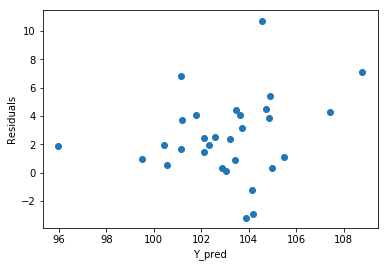

In [54]:
q5_partd("DATAT/2016.csv", "DATAT/2017.csv")

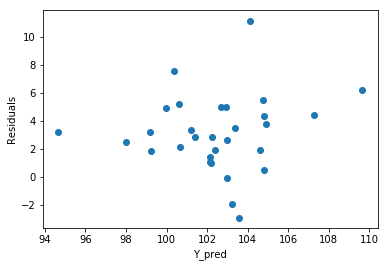

In [55]:
q5_partd("DATAT/2015_2016.csv", "DATAT/2017.csv")

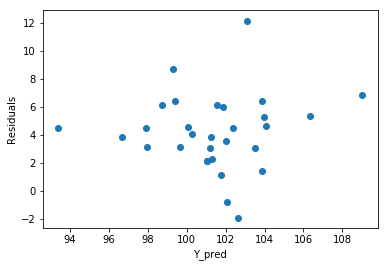

In [56]:
q5_partd("DATAT/2010_2016.csv", "DATAT/2017.csv")

# PART E

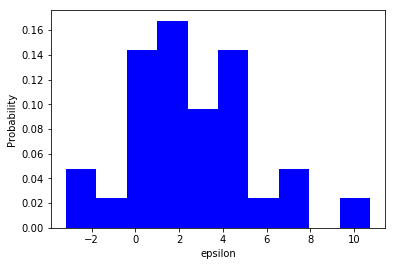

In [70]:
q5_parte("DATAT/2016.csv", "DATAT/2017.csv")

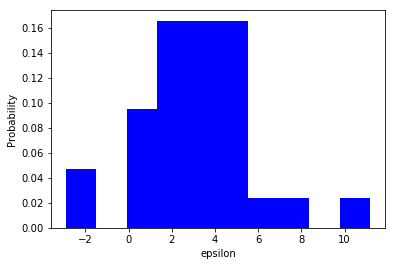

In [71]:
q5_parte("DATAT/2015_2016.csv", "DATAT/2017.csv")

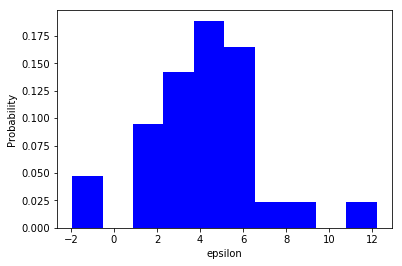

In [72]:
q5_parte("DATAT/2010_2016.csv", "DATAT/2017.csv")